In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
import json
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

In [2]:
# List for holding latitude, longitude and cities
latitude_longitude = []
cities = []

# Create a set of random latitude and longitude combinations
Latitude = np.random.uniform(low=-90.000, high=90.000, size=1500)
Longitude = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitude_longitude = zip(Latitude, Longitude)

# Identify nearest city for each latitude and longitude combinations
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

589

In [3]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = wkey
# settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"

In [4]:

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities[:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = url + "&q=" + urllib.request.pathname2url(city)
    city_url = url +"&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
         #Pause .2 mil sec
        time.sleep(.2)
        
    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | filingue
http://api.openweathermap.org/data/2.5/weather?appid=53875a55a5cfc003657dfdb7e5159fa4&units=imperial&q=filingue
Processing Record 2 of Set 1 | akhmim
http://api.openweathermap.org/data/2.5/weather?appid=53875a55a5cfc003657dfdb7e5159fa4&units=imperial&q=akhmim
Processing Record 3 of Set 1 | berdigestyakh
http://api.openweathermap.org/data/2.5/weather?appid=53875a55a5cfc003657dfdb7e5159fa4&units=imperial&q=berdigestyakh
Processing Record 4 of Set 1 | abha
http://api.openweathermap.org/data/2.5/weather?appid=53875a55a5cfc003657dfdb7e5159fa4&units=imperial&q=abha
Processing Record 5 of Set 1 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=53875a55a5cfc003657dfdb7e5159fa4&units=imperial&q=upernavik
Processing Record 6 of Set 1 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=53875a55a5cfc003657dfdb7e5159fa4&units=imperial&q=cherskiy
Processing Record 7 of Set 1

In [15]:
# Convert array into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("Output_CSV/WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()

City          42
Lat           42
Lng           42
Max Temp      42
Humidity      42
Cloudiness    42
Wind Speed    42
Country       42
Date          42
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,filingue,14.3521,3.3168,82.78,9,5,10.00,NE,1616958474
1,akhmim,26.5622,31.7450,66.20,24,0,16.11,EG,1616958474
2,berdigestyakh,62.0989,126.6992,-4.02,100,100,2.75,RU,1616958475
3,abha,18.2164,42.5053,64.40,72,0,0.74,SA,1616958475
4,upernavik,72.7868,-56.1549,-16.58,78,31,2.57,GL,1616958357
5,cherskiy,68.7500,161.3000,-9.71,92,100,0.31,RU,1616958476
6,ushuaia,-54.8000,-68.3000,46.40,61,40,29.93,AR,1616958476
7,avera,33.1940,-82.5271,78.80,53,90,13.80,US,1616958477
8,punta arenas,-53.1500,-70.9167,55.40,41,0,16.11,CL,1616958188
9,pevek,69.7008,170.3133,-22.40,100,63,0.85,RU,1616958478


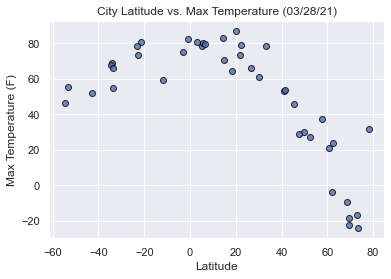

In [13]:
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Output_Plots/Latitude vs Temperature (F).png")

# Show plot
plt.show()

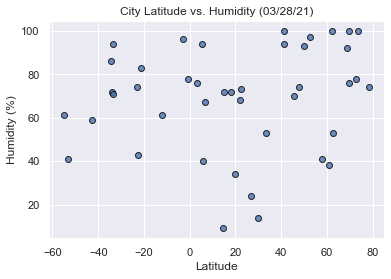

In [12]:

# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Output_Plots/Latitude vs Humidity (%).png")

# Show plot
plt.show()

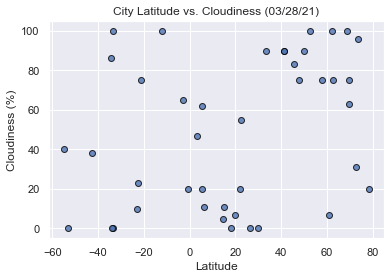

In [11]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Output_Plots/Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

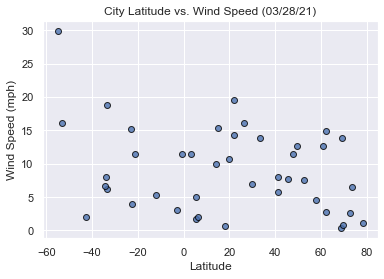

In [14]:

# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Output_Plots/Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()